<a href="https://colab.research.google.com/github/BillyTevin11/Coding-Projects/blob/main/Political_Violence_Events_in_Kenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace 'your_file_path' with the actual path to your xlsx file in Google Drive
file_path = '/content/drive/My Drive/Mapping/Political_Events.xlsx'
df = pd.read_excel(file_path)

print(df.head())

  Country     Month  Year  Events  Fatalities
0   Kenya   January  1997       3           6
1   Kenya  February  1997       3           9
2   Kenya     March  1997       6         179
3   Kenya     April  1997       4           7
4   Kenya       May  1997       4          22


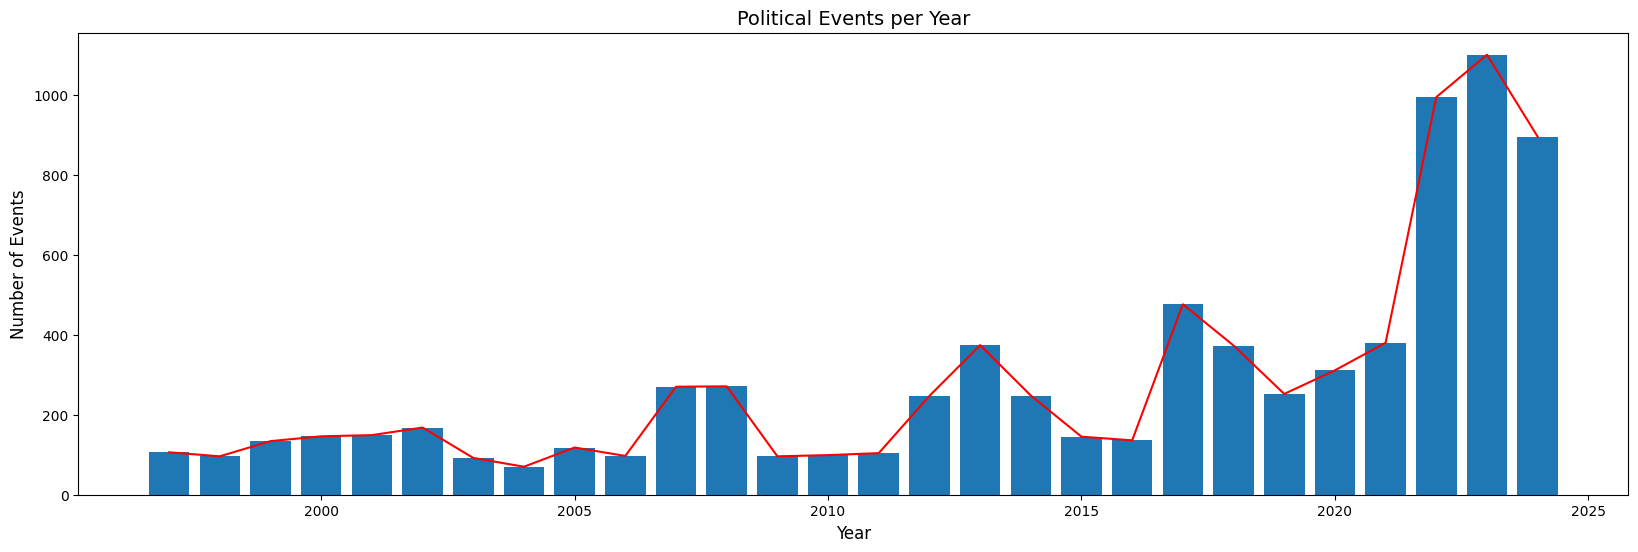

In [ ]:
import matplotlib.pyplot as plt

# Group by year and calculate the total number of events
events_per_year = df.groupby('Year')['Events'].sum()

# Create the column chart
plt.figure(figsize=(20, 6))  # Adjust figure size as needed
plt.bar(events_per_year.index, events_per_year.values)

# Add a trend line in red
z = events_per_year.index.astype(float) # Trend line needs numeric x-axis
plt.plot(z, events_per_year.values, color='red')

# Customize labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Political Events per Year', fontsize=14)

plt.show()

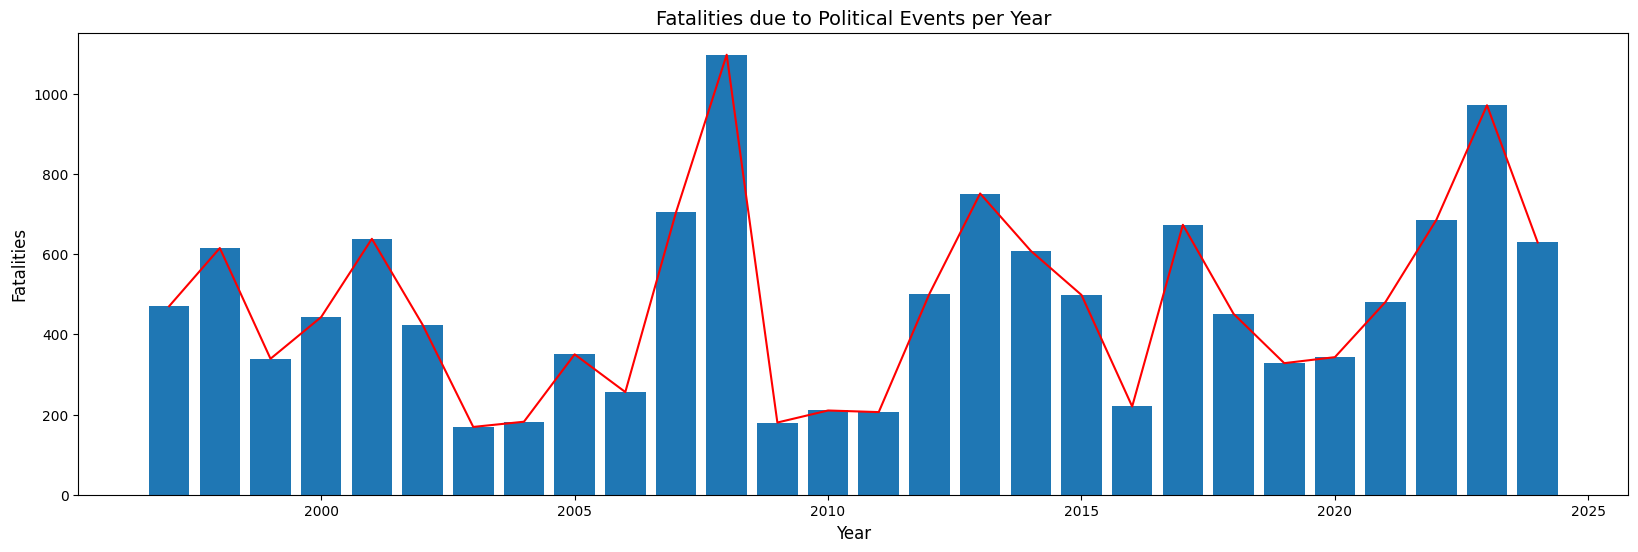

In [ ]:
# Group by year and calculate the total fatalities
fatalities_per_year = df.groupby('Year')['Fatalities'].sum()

# Create the column chart
plt.figure(figsize=(20, 6))
plt.bar(fatalities_per_year.index, fatalities_per_year.values)

# Add a trend line in red
z = fatalities_per_year.index.astype(float) # Trend line needs numeric x-axis
plt.plot(z, fatalities_per_year.values, color='red')

# Customize labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fatalities', fontsize=12)
plt.title('Fatalities due to Political Events per Year', fontsize=14)

plt.show()

Dropdown(description='Select Year:', index=26, options=(1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, …

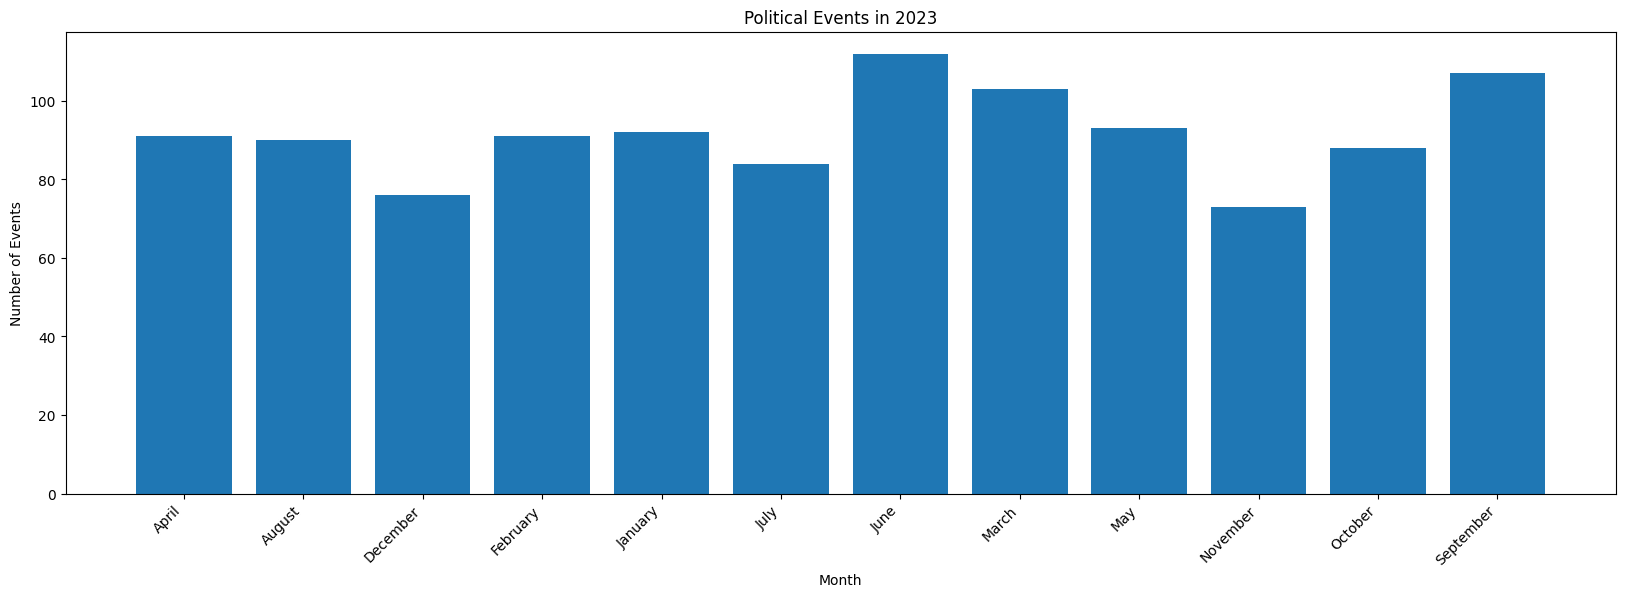

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Mapping/Political_Events.xlsx'
df = pd.read_excel(file_path)

# Create a dropdown widget for year selection
year_options = sorted(df['Year'].unique())
year_dropdown = widgets.Dropdown(
    options=year_options,
    value=year_options[0],
    description='Select Year:'
)

# Function to update the chart based on the selected year
def update_chart(change):
    selected_year = change.get('new', year_dropdown.value) # Get 'new' if available; otherwise, use current dropdown value
    df_year = df[df['Year'] == selected_year]
    events_per_month = df_year.groupby('Month')['Events'].sum()

    clear_output(wait=True)
    display(year_dropdown)

    plt.figure(figsize=(20, 6))
    plt.bar(events_per_month.index, events_per_month.values)
    plt.xlabel('Month')
    plt.ylabel('Number of Events')
    plt.title(f'Political Events in {selected_year}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Observe the dropdown for changes and call the update_chart function
year_dropdown.observe(update_chart, names='value')

# Display the dropdown initially
display(year_dropdown)

Correlation coefficient: 0.49584814790950793


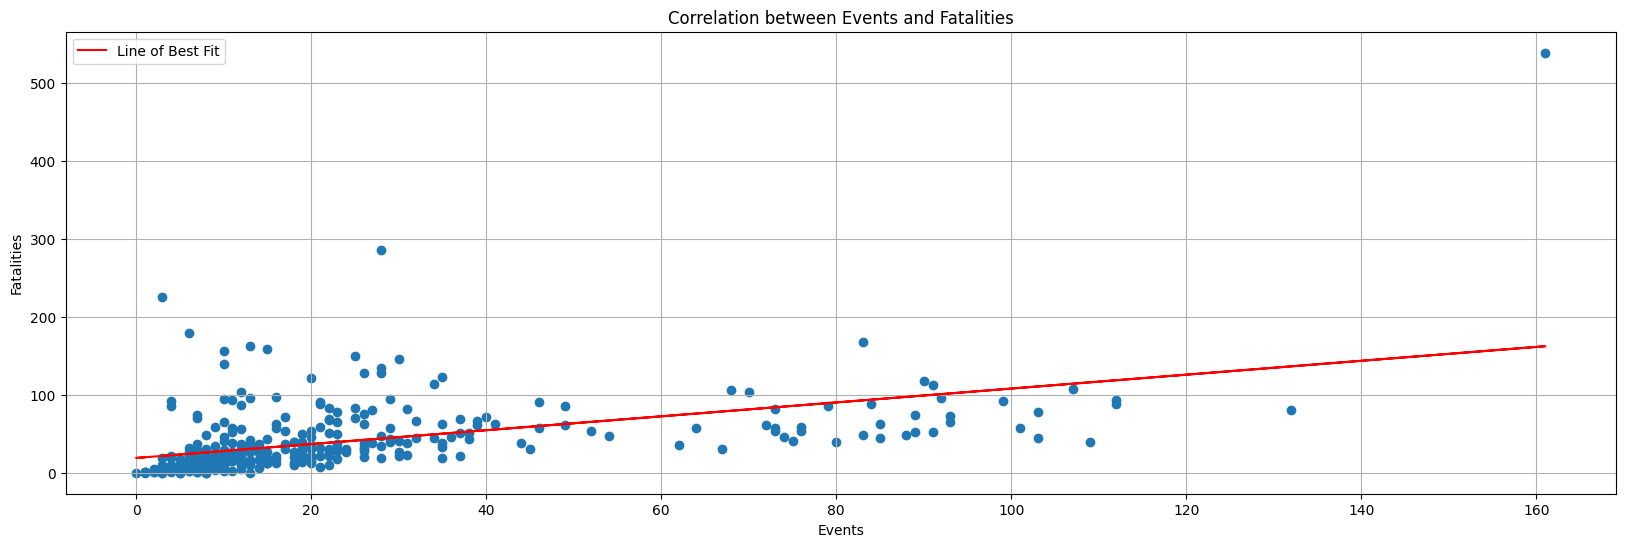

In [ ]:
import numpy as np

# Assuming 'df' is your DataFrame with 'Events' and 'Fatalities' columns

# Create the scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(df['Events'], df['Fatalities'])
plt.xlabel('Events')
plt.ylabel('Fatalities')
plt.grid(True)
plt.title('Correlation between Events and Fatalities')

# Calculate the correlation coefficient
correlation_coefficient = df['Events'].corr(df['Fatalities'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Calculate the line of best fit using linear regression
slope, intercept = np.polyfit(df['Events'], df['Fatalities'], 1)
line_of_best_fit = slope * df['Events'] + intercept

# Plot the line of best fit
plt.plot(df['Events'], line_of_best_fit, color='red', label='Line of Best Fit')
plt.legend()

plt.show()